In [1]:
import moth
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

PATH = '/storage/home/adz6/group/project'
VNADATAPATH = os.path.join(PATH, 'vna_data')
MOTHPATH = os.path.join(PATH, 'moth')
MOTHDATA = os.path.join(MOTHPATH, 'data/datasets')
PLOTPATH = os.path.join(PATH, 'plots/moth')


In [2]:
os.listdir(os.path.join(VNADATAPATH, 'cavity'))

['210920_open_cavity_1ghz.csv',
 '210920_open_cavity_1ghz_000inch.csv',
 '210920_open_cavity_1ghz_000inch_2.csv',
 '210920_open_cavity_1ghz_1000inch.csv',
 '210920_open_cavity_1ghz_1000inch_2.csv',
 '210920_open_cavity_1ghz_1000inch_3.csv',
 '210920_open_cavity_1ghz_250inch.csv',
 '210920_open_cavity_1ghz_250inch_2.csv',
 '210920_open_cavity_1ghz_500inch.csv',
 '210920_open_cavity_1ghz_500inch_2.csv',
 '210920_open_cavity_1ghz_500inch_3.csv',
 '210920_open_cavity_1ghz_750inch.csv',
 '210920_open_cavity_1ghz_750inch_2.csv',
 '210920_open_cavity_3ghz.csv',
 '210921_open_cavity.csv',
 '210921_open_cavity_double_coax.csv',
 '210921_open_cavity_double_coax_00mm.csv',
 '210921_open_cavity_double_coax_05mm.csv',
 '210921_open_cavity_double_coax_10mm.csv',
 '210921_open_cavity_double_coax_15mm.csv',
 '210921_open_cavity_double_coax_20mm.csv',
 '210921_open_cavity_double_coax_25mm.csv',
 '210921_open_cavity_double_coax_30mm.csv',
 '210921_open_cavity_double_coax_35mm.csv',
 '210921_open_cavity_

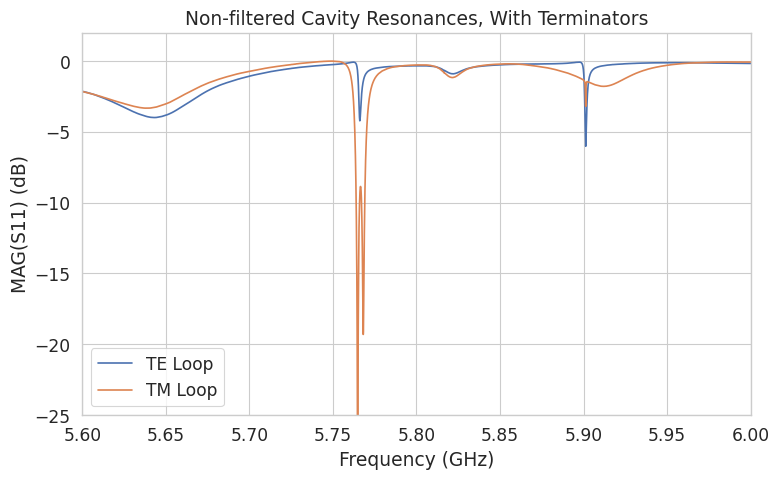

In [71]:
sns.set_theme(context='paper', style='whitegrid', font_scale=1.4)
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)

files = []

for f in ['210922_open_cavity_TE_loop_00mm.csv', '210922_open_cavity_TM_loop_00mm.csv']:
    files.append(os.path.join(os.path.join(VNADATAPATH, 'cavity', f)))

#file = os.path.join(os.path.join(VNADATAPATH, 'cavity', '210920_open_cavity_1ghz.csv'))

#labels = ['No Mode Filtering', 'With Mode Filtering']
labels = ['TE Loop', 'TM Loop']
for j, file in enumerate(files):

    with open(file, 'r') as infile:

        frequencies = []
        mag = []

        for i, line in enumerate(csv.reader(infile)):

            if i > 6:
                try:
                    frequencies.append(float(line[0]))

                    mag.append(10 * np.log10(float(line[1]) ** 2 + float(line[2]) ** 2))
                except:
                    continue
                    
        mag = np.array(mag) - np.max(mag)
    
    #if j == 1:
    #    ax.plot(np.array(frequencies)+10e6, mag)
    #if j == 2:
    #    ax.plot(np.array(frequencies)+60e6, mag)
    #if j == 0:
    #    ax.plot(np.array(frequencies), mag)
    #else:
    line = ax.plot(np.array(frequencies)*1e-9, mag, label=labels[j])
    

ax.set_xlim(5.6, 6.)
ax.set_ylim(-25, 2)

ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('MAG(S11) (dB)')

ax.set_title('Non-filtered Cavity Resonances, With Terminators')

ax.legend(loc=3)

name = '230613_TETM_nofilter_cav_with_term'
plt.tight_layout()
plt.savefig(os.path.join(PLOTPATH, name))

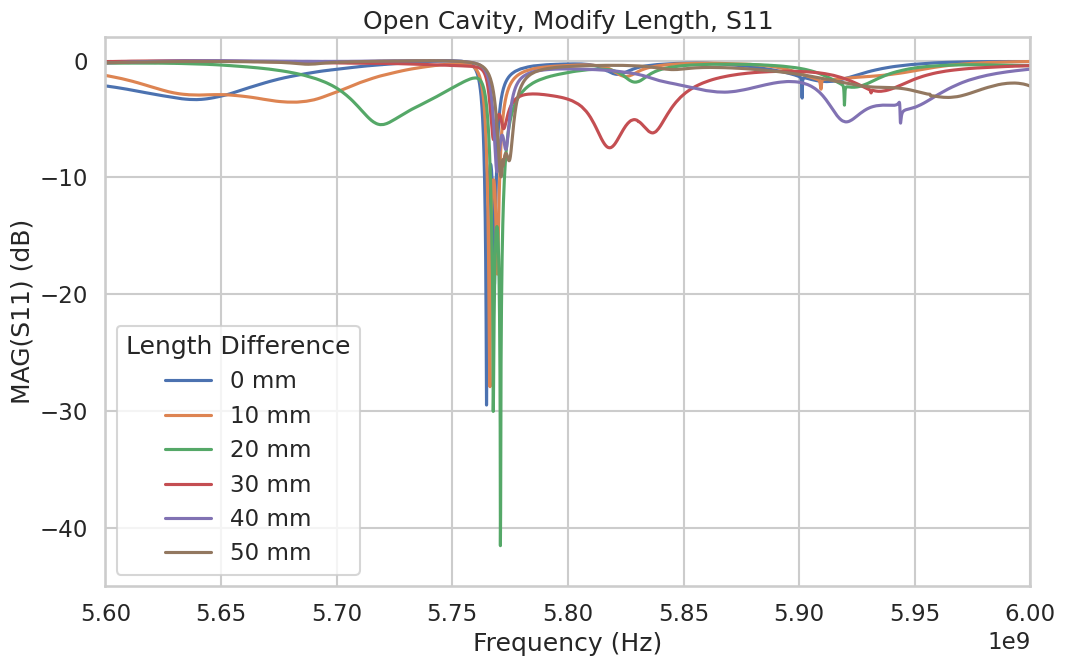

In [4]:
sns.set_theme(context='talk', style='whitegrid')

fig = plt.figure(figsize=(11,7))
ax = fig.add_subplot(1,1,1)

files = []

for f in ['210922_open_cavity_TM_loop_00mm.csv', '210922_open_cavity_TM_loop_10mm.csv', '210922_open_cavity_TM_loop_20mm.csv', '210922_open_cavity_TM_loop_30mm.csv', '210922_open_cavity_TM_loop_40mm.csv', '210922_open_cavity_TM_loop_50mm.csv']:
    files.append(os.path.join(os.path.join(VNADATAPATH, 'cavity', f)))

#file = os.path.join(os.path.join(VNADATAPATH, 'cavity', '210920_open_cavity_1ghz.csv'))

labels = [0, 10, 20, 30, 40, 50]

for j, file in enumerate(files):

    with open(file, 'r') as infile:

        frequencies = []
        mag = []

        for i, line in enumerate(csv.reader(infile)):

            if i > 6:
                try:
                    frequencies.append(float(line[0]))

                    mag.append(10 * np.log10(float(line[1]) ** 2 + float(line[2]) ** 2))
                except:
                    continue
                    
        mag = np.array(mag) - np.max(mag)
    
    #if j == 1:
    #    ax.plot(np.array(frequencies)+10e6, mag)
    #if j == 2:
    #    ax.plot(np.array(frequencies)+60e6, mag)
    #if j == 0:
    #    ax.plot(np.array(frequencies), mag)
    #else:
    ax.plot(np.array(frequencies), mag, label = f'{labels[j]} mm')

#ax.set_xlim(5.4e9, 6.4e9)
#ax.set_ylim(-25, 2)
ax.legend(title='Length Difference', loc=3)

ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('MAG(S11) (dB)')

ax.set_title('Open Cavity, Modify Length, S11')

ax.set_xlim(5.6e9, 6e9)
ax.set_ylim(-45, 2)

name = '210921_open_cavity_modify_length_TM_zoom'
plt.tight_layout()
plt.savefig(os.path.join(PLOTPATH, name))
#ax.set_ylim(-35, 5)

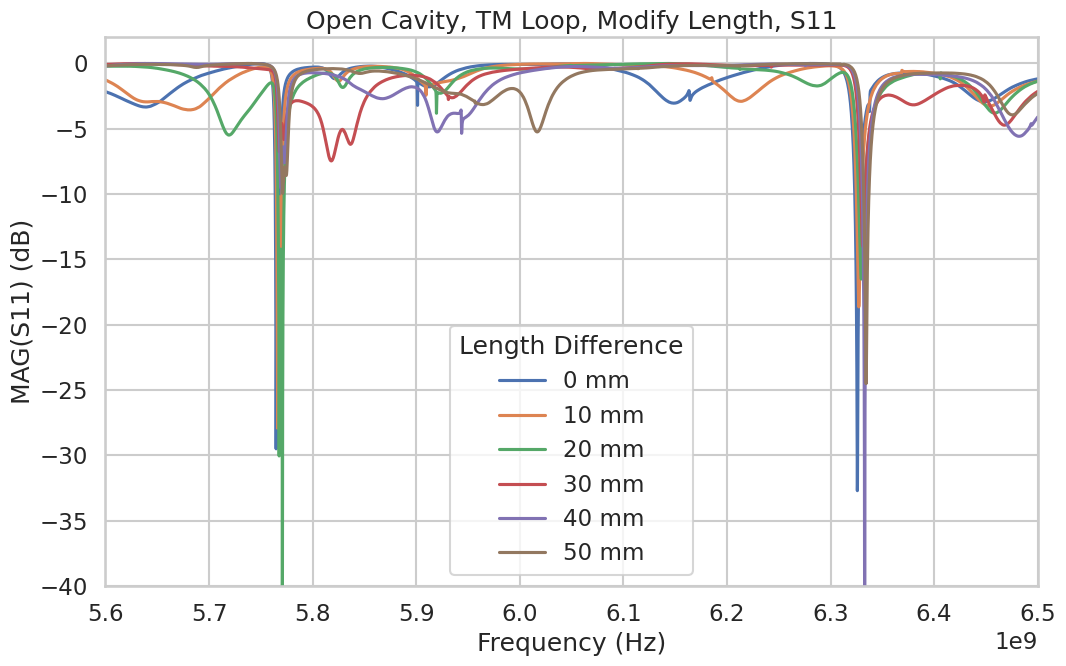

In [5]:

sns.set_theme(context='talk', style='whitegrid')

fig = plt.figure(figsize=(11,7))
ax = fig.add_subplot(1,1,1)

files = []

for f in ['210922_open_cavity_TM_loop_00mm.csv', '210922_open_cavity_TM_loop_10mm.csv', '210922_open_cavity_TM_loop_20mm.csv', '210922_open_cavity_TM_loop_30mm.csv', '210922_open_cavity_TM_loop_40mm.csv', '210922_open_cavity_TM_loop_50mm.csv']:
    files.append(os.path.join(os.path.join(VNADATAPATH, 'cavity', f)))

#file = os.path.join(os.path.join(VNADATAPATH, 'cavity', '210920_open_cavity_1ghz.csv'))

labels = [0, 10, 20, 30, 40, 50]

for j, file in enumerate(files):

    with open(file, 'r') as infile:

        frequencies = []
        mag = []

        for i, line in enumerate(csv.reader(infile)):

            if i > 6:
                try:
                    frequencies.append(float(line[0]))

                    mag.append(10 * np.log10(float(line[1]) ** 2 + float(line[2]) ** 2))
                except:
                    continue
                    
        mag = np.array(mag) - np.max(mag)
    
    #if j == 1:
    #    ax.plot(np.array(frequencies)+10e6, mag)
    #if j == 2:
    #    ax.plot(np.array(frequencies)+60e6, mag)
    #if j == 0:
    #    ax.plot(np.array(frequencies), mag)
    #else:
    ax.plot(np.array(frequencies), mag, label = f'{labels[j]} mm')

#ax.set_xlim(5.4e9, 6.4e9)
#ax.set_ylim(-25, 2)
ax.legend(title='Length Difference', loc=8)

ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('MAG(S11) (dB)')

ax.set_title('Open Cavity, TM Loop, Modify Length, S11')

ax.set_xlim(5.6e9, 6.5e9)
ax.set_ylim(-40, 2)
name = '210922_open_cavity_modify_length_TM'
plt.tight_layout()
plt.savefig(os.path.join(PLOTPATH, name))
#ax.set_ylim(-35, 5)

(5600000000.0, 6600000000.0)

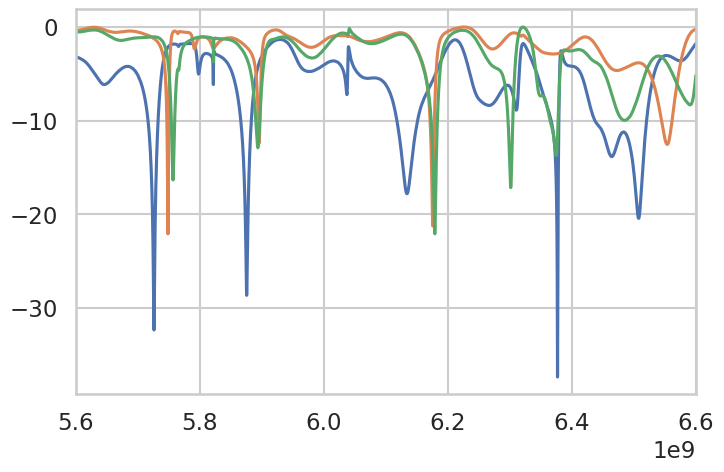

In [6]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)

files = []

for f in ['210920_open_cavity_1ghz_500inch_3.csv', '210920_open_cavity_1ghz_500inch_2.csv', '210920_open_cavity_1ghz_500inch.csv']:
    files.append(os.path.join(os.path.join(VNADATAPATH, 'cavity', f)))

#file = os.path.join(os.path.join(VNADATAPATH, 'cavity', '210920_open_cavity_1ghz.csv'))


for file in files:

    with open(file, 'r') as infile:

        frequencies = []
        mag = []

        for i, line in enumerate(csv.reader(infile)):

            if i > 6:
                try:
                    frequencies.append(float(line[0]))

                    mag.append(10 * np.log10(float(line[1]) ** 2 + float(line[2]) ** 2))
                except:
                    continue
                    
        mag = np.array(mag) - np.max(mag)
    
    ax.plot(frequencies, mag)

ax.set_xlim(5.6e9, 6.6e9)

(5600000000.0, 6600000000.0)

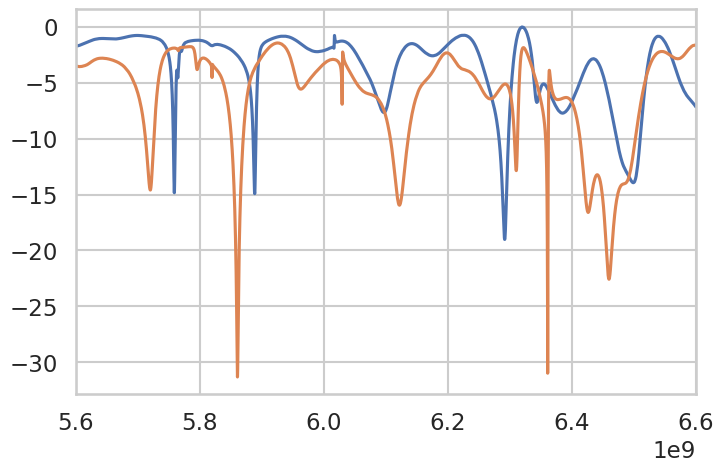

In [7]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)

files = []

for f in ['210920_open_cavity_1ghz_000inch.csv']:
    files.append(os.path.join(os.path.join(VNADATAPATH, 'cavity', f)))

#file = os.path.join(os.path.join(VNADATAPATH, 'cavity', '210920_open_cavity_1ghz.csv'))


for file in files:

    with open(file, 'r') as infile:

        frequencies = []
        mag = []

        for i, line in enumerate(csv.reader(infile)):

            if i > 6:
                try:
                    frequencies.append(float(line[0]))

                    mag.append(10 * np.log10(float(line[1]) ** 2 + float(line[2]) ** 2))
                except:
                    continue
                    
        mag = np.array(mag) - np.max(mag)
    
    ax.plot(frequencies, mag)

#ax.set_xlim(5.6e9, 6.6e9)

#fig = plt.figure(figsize=(8,5))
#ax = fig.add_subplot(1,1,1)

files = []

for f in ['210920_open_cavity_1ghz_250inch_2.csv']:
    files.append(os.path.join(os.path.join(VNADATAPATH, 'cavity', f)))

#file = os.path.join(os.path.join(VNADATAPATH, 'cavity', '210920_open_cavity_1ghz.csv'))


for file in files:

    with open(file, 'r') as infile:

        frequencies = []
        mag = []

        for i, line in enumerate(csv.reader(infile)):

            if i > 6:
                try:
                    frequencies.append(float(line[0]))

                    mag.append(10 * np.log10(float(line[1]) ** 2 + float(line[2]) ** 2))
                except:
                    continue
                    
        mag = np.array(mag) - np.max(mag)
    
    ax.plot(frequencies, mag)

ax.set_xlim(5.6e9, 6.6e9)